# Set 1, Ex 3: fitting polynomial data with noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

1) Addition of a Gaussian noise to the function $$ f(x)=7.2-3.1 x +4.3 x^3$$ in the interval (-5,8)

In [3]:
def f(x):
    return 7.2-3.1*x+4.3*x**3

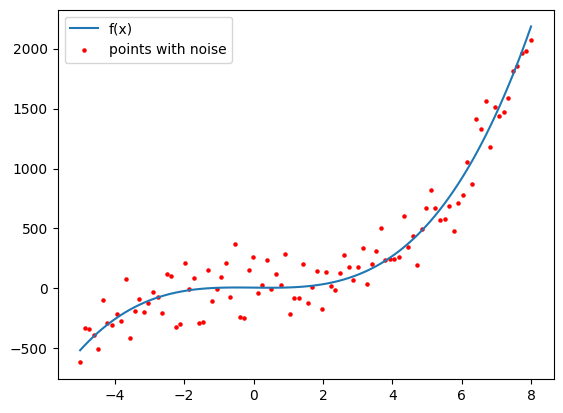

In [88]:
n_train = 100
x = np.linspace(-5,8,n_train)
m, sigma = 0, 150
# create a dataset from the function and add also some Gaussian noise
y = f(x)+np.random.normal(m, sigma, n_train)

plt.plot(x,f(x), label = 'f(x)')
plt.scatter(x, y, c='r', s=5, label = 'points with noise')
plt.legend()
plt.show()

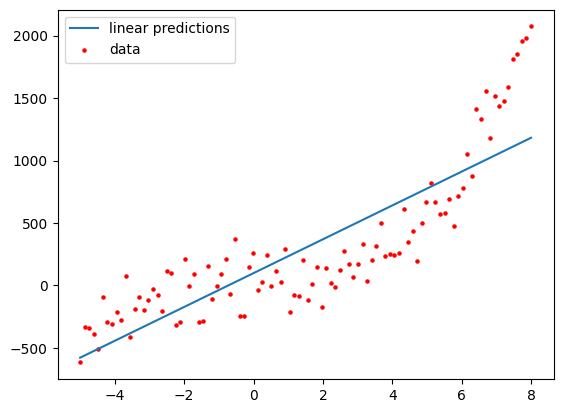

linear model score is 0.712


In [89]:
# fit a linear regression model
model_linear = linear_model.LinearRegression()

# reshape the features in the form n_samples, n_features, i.e. in our 1-dim data in (n_samples, 1)
model_linear.fit(x.reshape(-1, 1), y)

# get the predictions
y_hat = model_linear.predict(x.reshape(-1,1))

# plot the data and the linear prediction
plt.plot(x, y_hat, label = 'linear predictions')
plt.scatter(x, y, s = 5, c = 'red', label = 'data')
plt.legend()
plt.show()

# get some metrics
print(f'linear model score is {round(model_linear.score(x.reshape(-1, 1), y), 3) }' )

Now add polynomial features to the data and make them multidimensional featured as $$[x] \rightarrow [x, x^2, x^3,\dots]$$ 
and then fit a linear model on the new data as $$ \hat{y}^{(i)} = f_{\vec{w},b}(\vec{x}^{(i)}) = \vec{w}\cdot \vec{x}^{(i)} + b$$

with degree 2 polynomial features the number of features is (100, 3)


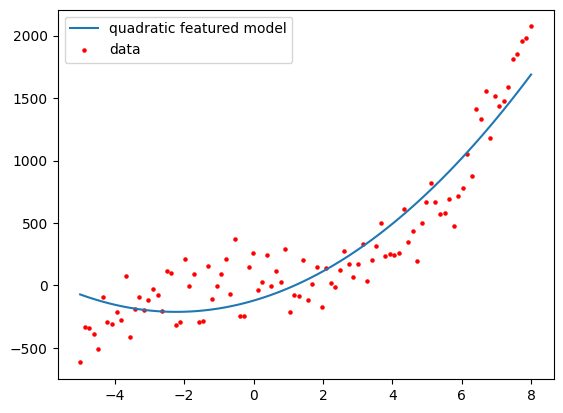

linear model score is 0.859


In [91]:
#Alternative using sklearn.preprocessing tools
deg_two_model = linear_model.LinearRegression()

# to generate polynomial features use the PolynomialFeatures class
deg2 = PolynomialFeatures(degree = 2)
features = deg2.fit_transform(x.reshape(-1,1))
print(f'with degree 2 polynomial features the number of features is {features.shape}' )

deg_two_model.fit(features, y)
y_hat_2 = deg_two_model.predict(features)

#plot the fitted function
plt.plot(x, y_hat_2, label = 'quadratic featured model')
#scatter plot data
plt.scatter(x, y, s = 5, c = 'red', label = 'data')
plt.legend()
plt.show()
print(f'linear model score is {round(deg_two_model.score(features, y), 3) }' )


In [92]:
def fit_polynomial(degree, x, y):
    assert x.shape == (x.size, 1)
    model = linear_model.LinearRegression()
    # add polynomial features
    new_x = PolynomialFeatures(degree= degree).fit_transform(x)
    model.fit(new_x, y)
    y_hat_pol = model.predict(new_x)
    model_score = model.score(new_x, y)

    return y_hat_pol, model_score

def plot_pol(x, y, arr_predictions, degrees, scores):
    for d, pred, score in zip(degrees, arr_predictions, scores):
        plt.plot(x.flatten(), pred, label = f'model of degree {d}, score {round(score, 5)}')
    plt.scatter(x.flatten(), y, s = 5, c = 'red')
    plt.legend()
    plt.show()
    

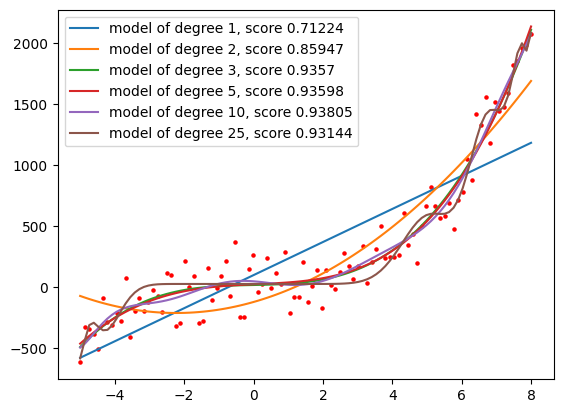

In [94]:
degrees = [1, 2, 3, 5, 10, 25]
polynomial_predictions = []
scores = []
for d in degrees:
    y_hat_new, score_new = fit_polynomial(d, x.reshape(-1,1), y)
    polynomial_predictions.append(y_hat_new)
    scores.append(score_new)

plot_pol(x, y, polynomial_predictions, degrees, scores)

# Fit in part of the data

Now try to fit the data using only part of the data. Some approaches
- use the first half of the data
- use the middle half of the data
- suffle the data and pick at random half of the data

In [116]:
def fit_polynomial_partial(degree, x_train, y_train, x, y):
    assert x.shape == (x.size, 1)
    model = linear_model.LinearRegression()

    # add polynomial features
    new_x_train = PolynomialFeatures(degree= degree).fit_transform(x_train)
    model.fit(new_x_train, y_train)

    # make predictions for the whole data set
    new_x = PolynomialFeatures(degree= degree).fit_transform(x)
    y_hat_pol = model.predict(new_x)
    model_score = model.score(new_x, y)

    return y_hat_pol, model_score

def plot_pol(x, y, arr_predictions, degrees, scores):
    fig, ax = plt.subplots()
    for d, pred, score in zip(degrees, arr_predictions, scores):
        ax.plot(x.flatten(), pred, label = f'model of degree {d}, score {round(score, 5)}')
    ax.scatter(x.flatten(), y, s = 5, c = 'red')
    ax.legend()
    
    return fig, ax

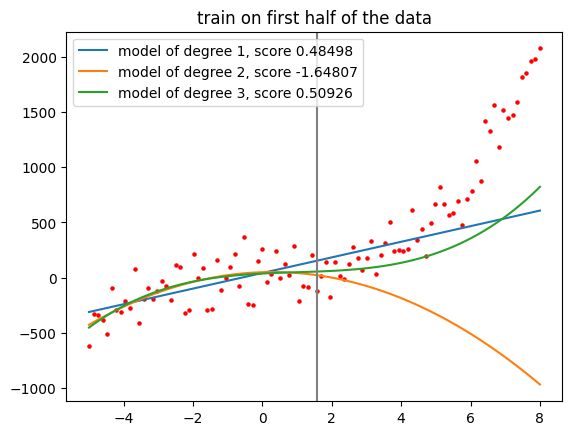

In [122]:
# training on the first half of the data
x_first_half = x[:n_train//2]
y_first_half = y[:n_train//2]

degrees = [1, 2, 3]
polynomial_predictions = []
scores = []
for d in degrees:
    y_hat_new, score_new = fit_polynomial_partial(d, x_first_half.reshape(-1,1), y_first_half, x.reshape(-1,1), y)
    polynomial_predictions.append(y_hat_new)
    scores.append(score_new)

fig, ax = plot_pol(x, y, polynomial_predictions, degrees, scores)
ax.axvline(x[n_train//2], c = 'grey')
plt.title('train on first half of the data')

plt.show()

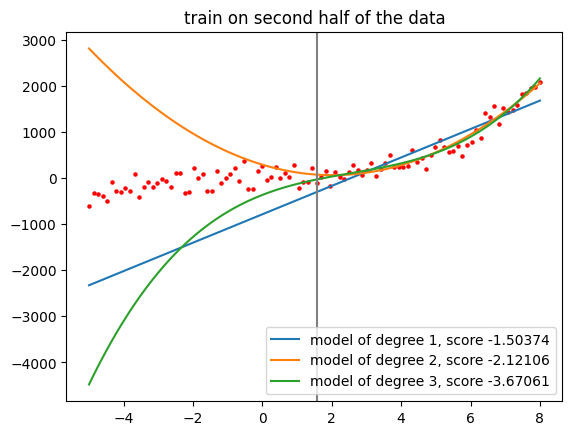

In [124]:
# training on the second half of the data
x_second_half = x[n_train//2:]
y_second_half = y[n_train//2:]

degrees = [1, 2, 3]
polynomial_predictions = []
scores = []
for d in degrees:
    y_hat_new, score_new = fit_polynomial_partial(d, x_second_half.reshape(-1,1), y_second_half, x.reshape(-1,1), y)
    polynomial_predictions.append(y_hat_new)
    scores.append(score_new)

fig, ax = plot_pol(x, y, polynomial_predictions, degrees, scores)
ax.axvline(x[n_train//2], c = 'grey')
plt.title('train on second half of the data')

plt.show()

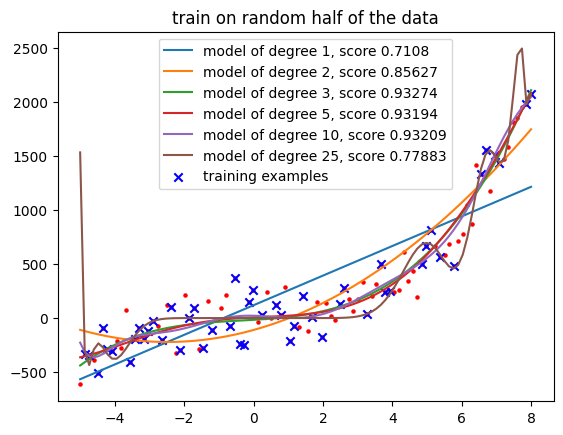

In [167]:
# training on the randomly choosen half of the data
# choose half indices at random
n_random = np.arange(n_train)
np.random.shuffle(n_random)
x_half_random = x[n_random[:n_train//2]]
y_half_random = y[n_random[:n_train//2]]

degrees = [1, 2, 3, 5, 10, 25]
polynomial_predictions = []
scores = []
for d in degrees:
    y_hat_new, score_new = fit_polynomial_partial(d, x_half_random.reshape(-1,1), y_half_random, x.reshape(-1,1), y)
    polynomial_predictions.append(y_hat_new)
    scores.append(score_new)

fig, ax = plot_pol(x, y, polynomial_predictions, degrees, scores)
# ax.axvline(x[n_train//2], c = 'grey')
plt.title('train on random half of the data')
plt.scatter(x_half_random, y_half_random, marker= 'x', c = 'b', label = 'training examples')
plt.legend()
plt.show()

### Consider now a polynomial with complex coefficients and variables

In [168]:
def complex_pol(x, coef_list):
    return sum([c*x**i for (i,c) in enumerate(coef_list)])

In [244]:
n_train = 10
a, b = -3, 8
m, sigma = 0, 150

x_real = np.linspace(a, b, n_train)
x_imaginary = np.linspace(a, b, n_train)
grid = np.meshgrid(x_real, x_imaginary)
x_data = np.stack([grid[0].reshape(-1,), grid[1].reshape(-1, )], axis=1)
coef = [17 + 0.2j, - (3.1 - 50j), 0, (4.3 + 0.7j)]
y_complex = complex_pol(x_data.T[0] + 1j*x_data.T[1], coef)
# transform 1-dim complex data to two-dim real data, add also some noise
y_real = np.real(y_complex)+np.random.normal(m, sigma, n_train**2)
y_imaginary = np.imag(y_complex)+np.random.normal(m, sigma, n_train**2)
y_data = np.stack([y_real, y_imaginary], axis = -1)

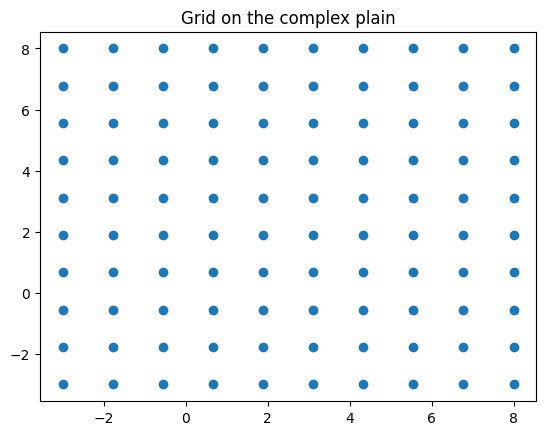

In [245]:
plt.scatter(x_data.T[0], x_data.T[1])
plt.title('Grid on the complex plain')
plt.show()

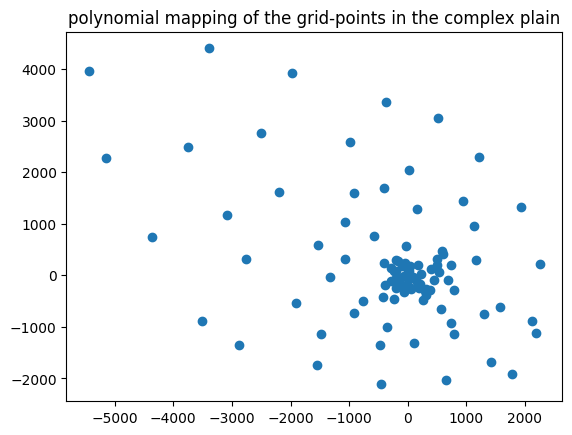

In [246]:
plt.scatter(y_data.T[0], y_data.T[1])
plt.title('polynomial mapping of the grid-points in the complex plain')
plt.show()

score of the linear model is 0.34339298621129505


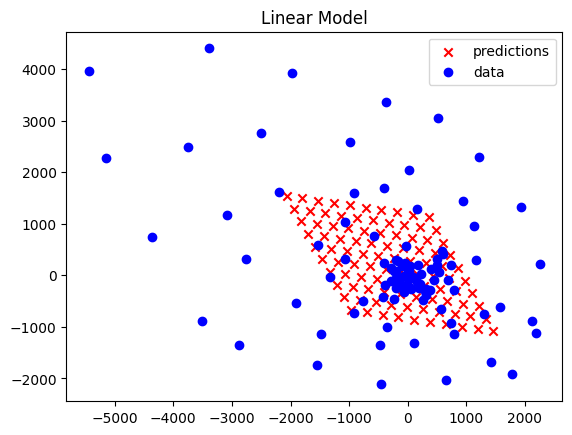

In [247]:
# fit a linear model
model = linear_model.LinearRegression()
model.fit(x_data, y_data)
pred = model.predict(x_data)
print(f'score of the linear model is { model.score(x_data, y_data)}')
plt.scatter(pred.T[0], pred.T[1], marker = 'x', c='r', label = 'predictions')
plt.scatter(y_data.T[0], y_data.T[1], marker= 'o', c='b', label = 'data')
plt.title('Linear Model')
plt.legend()
plt.show()

score of the linear model is 0.8349411381440799


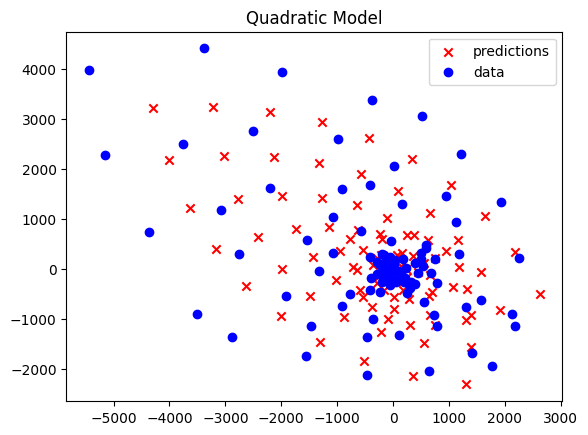

In [248]:
# add quadratic features
model2 = linear_model.LinearRegression()
new_x_data = PolynomialFeatures(degree= 2).fit_transform(x_data)
model.fit(new_x_data, y_data)
pred = model.predict(new_x_data)
print(f'score of the linear model is { model.score(new_x_data, y_data)}')
plt.scatter(pred.T[0], pred.T[1], marker = 'x', c='r', label = 'predictions')
plt.scatter(y_data.T[0], y_data.T[1], marker= 'o', c='b', label = 'data')
plt.title('Quadratic Model')
plt.legend()
plt.show()

score of the linear model is 0.9868964681580208


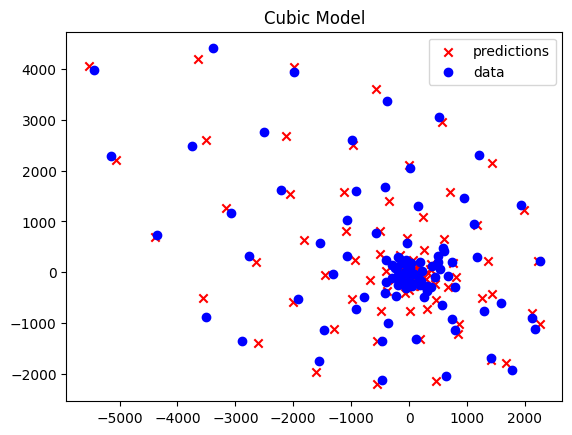

In [249]:
# add quadratic features
model2 = linear_model.LinearRegression()
new_x_data = PolynomialFeatures(degree= 3).fit_transform(x_data)
model.fit(new_x_data, y_data)
pred = model.predict(new_x_data)
print(f'score of the linear model is { model.score(new_x_data, y_data)}')
plt.scatter(pred.T[0], pred.T[1], marker = 'x', c='r', label = 'predictions')
plt.scatter(y_data.T[0], y_data.T[1], marker= 'o', c='b', label = 'data')
plt.title('Cubic Model')
plt.legend()
plt.show()